# Numpy의 사용 이유, 

# 벡터화와 브로드캐스팅에 대해 알아보자.

## Vectorization

인공지능/데이터사이언스를 다루고자 한다면 우리는 반드시 벡터화 연산에 대해 이해해야한다.
우리에게 친숙한 For문을 사용하여 대부분의 연산을 수행할 수 있지만, 
우리는 코드에 등장하는 for를 최대한 제거해야 한다.
그 이유를 살펴 보자.

In [2]:
## Vectorization 과 For문의 속도 차이를 직접 보자.

import matplotlib.pyplot as plt
import time
import numpy as np

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print("Value of C : " + str(c))
print("Vectorized Version : "+ str(1000*(toc-tic))+"ms")
Vec = 1000*(toc-tic)

# 벡터화 연산 (병렬 연산)

c = 0

tic = time.time()
for i in range(1000000):
    c = c+a[i]*b[i]
toc = time.time()

print("Value of C : " + str(c))
print("For Loop Version : "+ str(1000*(toc-tic))+"ms\n")
For = 1000*(toc-tic)

# For문 연산

print("계산 결과는 같지만, " +str(For/Vec)+"배의 속도 차이가 존재한다.")

Value of C : 249959.34870439398
Vectorized Version : 31.911611557006836ms
Value of C : 249959.34870440306
For Loop Version : 741.356372833252ms

계산 결과는 같지만, 23.23155543269554배의 속도 차이가 존재한다.


## 다른 벡터화 함수들

In [3]:
vector = np.random.rand(50)
Exponential_ex = np.exp(vector)
Logarithm_ex = np.log(vector)
Maximum_ex = np.maximum(0,vector)
Square_ex = vector**2
Inverse_ex = 1/vector

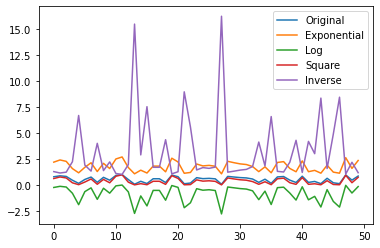

In [4]:
plt.plot(vector, label = 'Original')
plt.plot(Exponential_ex, label = 'Exponential')
plt.plot(Logarithm_ex, label = 'Log')
plt.plot(Square_ex, label = 'Square')
plt.plot(Inverse_ex, label = 'Inverse')
plt.legend(loc='upper right')
plt.show()

결론 : 우리는 for 대신 numpy의 내장함수들을 활용하여 계산시간을 획기적으로 단축할 수 있다!

## Broadcasting

verb (used with object), broadcast or broadcasted,broadcasting.

1. to transmit (programs) from a radio or television station.

2. to speak, perform, sponsor, or present on a radio or televisionprogram:

3. to cast or scatter abroad over an area, as seed in sowing.

4. to spread widely; disseminate: ★

5. to indicate unwittingly to another (one's next action); telegraph:


Linear Algebra에서의 Matrix Calculation 법칙

1. 행렬의 덧셈,뺄셈은 두 행렬의 크기가 동일해야 수행할 수 있다.
2. 행렬의 곱셈은 앞 행렬의 열의 개수와, 뒤 행렬의 행의 개수가 같아야 수행할 수 있다.

Python에서는?? 응 아니야~

물론 for를 사용해서 크기가 맞지 않는 행렬끼리의 연산을 수행할 수도 있지만, for의 사용은 최대한 지양해야만 한다.

우리는 Numpy 내장 논리를 이용해서 for를 사용하지 않고 코드를 구현할 수 있다.

Matrix의 차원을 [m,n] 과 같이 표현하도록 하겠다.

[4,3] + [1,1]  의 연산이 가능하다! 코드를 보자

In [57]:
A = np.array([[56.0 ,0.0, 4.4, 68.0],
             [1.2, 104.0, 52.0, 8.0],
             [1.8, 135.0, 99.0, 0.9]])

A

array([[ 56. ,   0. ,   4.4,  68. ],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [59]:
cal = A.sum(axis=0) # 열의 원소들을 더하기
cal

array([ 59. , 239. , 155.4,  76.9])

In [61]:
percentage = 100*A/cal.reshape(1,4) # [3,4] / [1,4] 행렬 연산???
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

reshape는 O(1)연산이기 때문에, 부담없이 사용하자. 
에러를 줄이는 데에 효과적이다!

그나저나, 도대체 어떻게 말도 안되는 행렬연산이 이루어진 것일까?
그 비밀은 브로드캐스팅의 작동원리에 있다.

일단 예시를 몇개 더 보자

In [63]:
B = np.array([1,2,3,4])
B

array([1, 2, 3, 4])

In [64]:
B + 100 # [1,4] + [1,1] 행렬 연산??? elementwise calclation / broadcasting? (전혀 중요하지 않음)

array([101, 102, 103, 104])

In [66]:
C = np.array([[1,2,3],[4,5,6]])
C

array([[1, 2, 3],
       [4, 5, 6]])

In [67]:
C + [100,200,300] # [2,3]+[1,3] 행렬 연산???

array([[101, 202, 303],
       [104, 205, 306]])

보다시피, 선형대수학의 기본 원리를 무시하는 계산이 멀쩡히 수행된다.
이것은 브로드캐스팅의 'disemination'의 의미에서부터 시작한다.

파이썬 내부 논리에 의해,

[1,4] + [1,1] 연산에서 
[1,1] 벡터는 '흩뿌려져' [1,4]의 벡터가 된다.


[2,3]+[1,3] 에서 [1,3]는 '흩뿌려져' [2,3] 벡터가 된다.



B 예시를 자세히 보면,
[1,2,3,4] + [100] --> [1,2,3,4] + [100,100,100,100] 

가 수행되어 결국엔 선형대수 법칙을 무시하지 않게 되는 것이다. 

### 주의 사항

np.random.randn(5)는 벡터를 생성하지 않는다.

위와 같은 명령어는 Rank 1 array라고 불리며, 각종 오류의 주범이다. 


그 대신 
np.random.randn(5,1) --> 열 벡터 

np.random.randn(1,5) --> 행 벡터

를 사용하여 벡터를 생성하자. 

실수로라도 Rank 1 array가 만들어지는 것을 방지하기 위해 reshape와 assert를 자주 사용하도록 하자

In [82]:
# 오류 발생의 예시. 원한 건 외적이나, 내적 계산이 수행됨
a=np.random.randn(5)
a.shape

(5,)

In [73]:
print(a)
print(a.T)
# 둘이 똑같이 생겼다.

[ 0.55768119 -0.68649743 -0.57035471 -3.06327754 -0.79595519]
[ 0.55768119 -0.68649743 -0.57035471 -3.06327754 -0.79595519]


In [75]:
np.dot(a,a.T)
# 외적이 실행되지 않는다.

11.124805496967328

In [76]:
a=np.random.randn(5,1)
a.shape

(5, 1)

In [80]:
print(a)
print(a.T)
# 전치가 제대로 이루어진다.

[[-1.11584219]
 [-0.30025276]
 [ 1.05697199]
 [ 0.99137002]
 [ 0.45399855]]
[[-1.11584219 -0.30025276  1.05697199  0.99137002  0.45399855]]


In [81]:
np.dot(a,a.T)
# 외적이 실행된다.

array([[ 1.2451038 ,  0.3350347 , -1.17941395, -1.10621249, -0.50659073],
       [ 0.3350347 ,  0.09015172, -0.31735876, -0.29766158, -0.13631432],
       [-1.17941395, -0.31735876,  1.11718979,  1.04785034,  0.47986375],
       [-1.10621249, -0.29766158,  1.04785034,  0.98281451,  0.45008055],
       [-0.50659073, -0.13631432,  0.47986375,  0.45008055,  0.20611468]])

In [104]:
# reshape함수 활용
a=np.random.randn(5)
print(a.shape)
b = a.reshape(1,5)
print(b.shape)

(5,)
(1, 5)


In [105]:
# assert 함수 활용
a=np.random.randn(5)
assert(a.shape == (5,1))

AssertionError: 

In [107]:
b = a.reshape(1,5)
assert(b.shape == (1,5))